# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [3]:
import zipfile

from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np
from zipfile import ZipFile
SearchText="Mark"

filename="readonly/images.zip"

#OPENING THE ZIP FILE and PUT IMAGES IN A LIST#
with ZipFile(filename, 'r') as myzip:

    # Extract all the contents of zip file in current directory
    listOfFileNames = myzip.namelist()

    myzip.extractall()
#print(listOfFileNames)

#create dictionary with {FILE NAME,[Binary Image, TEXT]}

ImageDict={}
for file in listOfFileNames:
#    print (file)
    img = Image.open(file).convert('L')
    text = pytesseract.image_to_string(img) # Gets text from pictures
    #print (text)
    ImageDict[file]=[img,text]
#print(ImageDict)

 
    
    
    
    

Results found in File a-0.png


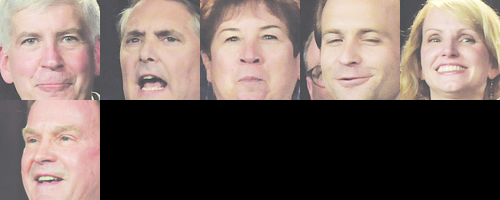

Results found in File a-1.png


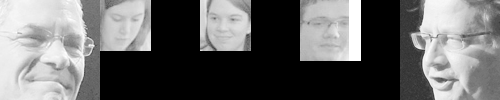

Results found in File a-10.png
But there were no faces in that file!
Results found in File a-13.png


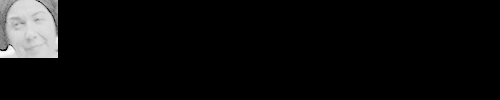

Results found in File a-2.png


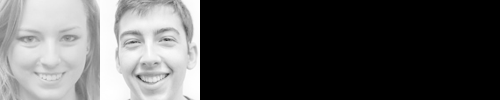

Results found in File a-3.png


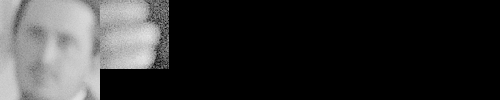

Results found in File a-8.png
But there were no faces in that file!


In [5]:
import PIL
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

#LOOP THROUGH IMAGES
    #IF TEXT IN IMAGE THEN RETURN POSSIBLE FACES

for file in listOfFileNames:
    if SearchText in ImageDict[file][1]:
        print("Results found in File " + file)
        img = cv.imread(file)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.30,5)
        facelist=[]
        for x, y,w,h  in faces:
            face=Image.open(file).crop((x,y,x+w,y+w))
            #display(face)
            facelist.append(face) 
        
        
        
        #ImageDict[file].append(facelist)
        #CREATES CONTACT SHEET#
        try:
               # test=len(ImageDict[file][2][0])
            thumbnailheight=100
            thumbnailwidth=100
            first_image=facelist[0] 
            
            width=5*thumbnailwidth
            height=((len(facelist)-1)//5+1)*thumbnailheight

            contact_sheet=PIL.Image.new(first_image.mode, (width,height))
            x=0
            
            y=0

            for img in facelist:
                w=img.width
                # Lets paste the current image into the contact sheet
                thum=img.copy()
                if w>thumbnailwidth: 
                    thum.thumbnail((thumbnailwidth,thumbnailheight))

                contact_sheet.paste(thum, (x, y) )
                # Now we update our X position. If it is going to be the width of the image, then we set it to 0
                # and update Y as well to point to the next "line" of the contact sheet.
                if x+thumbnailwidth == contact_sheet.width:
                    x=0
                    y=y+thumbnailheight
                else:
                    x=x+thumbnailwidth

                # resize and display the contact sheet
            #contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
            display(contact_sheet)
        except:
            print('But there were no faces in that file!')